In [6]:
from pathlib import Path
import io
from pprint import pprint
from PIL import Image
import torch

In [14]:
def load_all_checkpoints(ticker: str):
    """
    Load every checkpoint matching `{ticker}_*.pth` in the current working directory.
    For each checkpoint:
      1) load checkpoint dict (CPU),
      2) print hparams and train/val metrics,
      3) display train plot if present,
    """
    cwd = Path.cwd()
    ckpt_paths = sorted(cwd.glob(f"{ticker}_*.pth"))

    loaded = {}
    for p in ckpt_paths:
        print("Loading checkpoint:", p)
        ckpt = torch.load(p, map_location="cpu", weights_only=False)

        print("\nHyperparameters:")
        pprint(ckpt.get("hparams", {}))

        if "train_plot_png" in ckpt:
            try:
                img = Image.open(io.BytesIO(ckpt["train_plot_png"]))
                display(img)
            except Exception:
                print("  (train_plot_png present but could not display)")

        print("\nTrain metrics:", ckpt.get("train_metrics"))
        print(" Val metrics:", ckpt.get("val_metrics"))
        print('\n------------------------------------------------------------------------------------------------------------------------------\n')

    return loaded


Loading checkpoint: /workspace/my_models/Trading/_Stock_Analysis_/trainings/AAPL_0.24260_fin.pth

Hyperparameters:
{'ATT_DROPOUT': 0.15,
 'ATT_HEADS': 4,
 'CLIPNORM': 3,
 'CLS_LOSS_WEIGHT': 0.05,
 'DROPOUT_LONG': 0.15,
 'DROPOUT_SHORT': 0.15,
 'EARLY_STOP_PATIENCE': 6,
 'ETA_MIN': 1e-06,
 'HUBER_BETA': 0.1,
 'INITIAL_LR': 9e-05,
 'LONG_UNITS': 96,
 'LR_EPOCHS_WARMUP': 3,
 'MAX_EPOCHS': 90,
 'MIN_LR': 1e-06,
 'NUM_WORKERS': 4,
 'PLATEAU_FACTOR': 0.9,
 'PLATEAU_PATIENCE': 0,
 'PLAT_EPOCHS_WARMUP': 999,
 'SHORT_UNITS': 64,
 'TRAIN_BATCH': 64,
 'TRAIN_PREFETCH_FACTOR': 2,
 'T_0': 90,
 'T_MULT': 1,
 'VAL_BATCH': 1,
 'WEIGHT_DECAY': 3e-05}


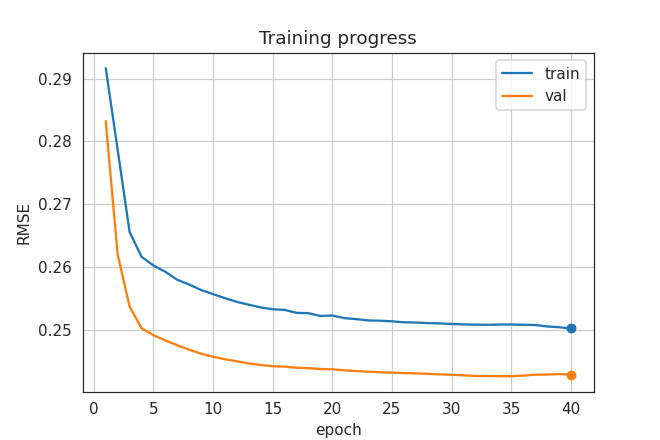


Train metrics: {'rmse': 0.25082677602767944, 'mae': 0.19196707010269165, 'r2': 0.25170838832855225, 'acc': 0.3797435462474823, 'prec': 0.28129884600639343, 'rec': 0.8432267308235168, 'f1': 0.42186450958251953, 'auroc': 0.5634651184082031}
 Val metrics: {'rmse': 0.24260444939136505, 'mae': 0.18113167583942413, 'r2': 0.2661152482032776, 'acc': 0.35356640815734863, 'prec': 0.281869113445282, 'rec': 0.8812391757965088, 'f1': 0.42712119221687317, 'auroc': 0.5589879751205444}

-------------------------------------------------------------------------------------------------------------------------------

Loading checkpoint: /workspace/my_models/Trading/_Stock_Analysis_/trainings/AAPL_0.24397_fin.pth

Hyperparameters:
{'ATT_DROPOUT': 0.15,
 'ATT_HEADS': 4,
 'CLIPNORM': 3,
 'CLS_LOSS_WEIGHT': 0.05,
 'DROPOUT_LONG': 0.15,
 'DROPOUT_SHORT': 0.15,
 'EARLY_STOP_PATIENCE': 6,
 'ETA_MIN': 1e-06,
 'HUBER_BETA': 0.1,
 'INITIAL_LR': 9e-05,
 'LONG_UNITS': 96,
 'LR_EPOCHS_WARMUP': 3,
 'MAX_EPOCHS': 90,
 

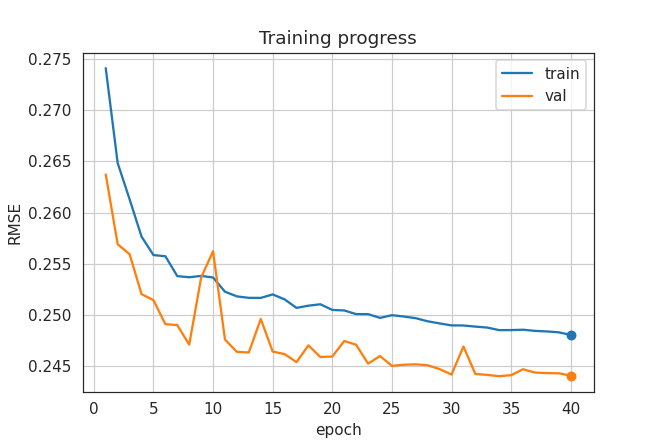


Train metrics: {'rmse': 0.24847911298274994, 'mae': 0.19007329642772675, 'r2': 0.27636224031448364, 'acc': 0.669701337814331, 'prec': 0.3613009750843048, 'rec': 0.2223912924528122, 'f1': 0.2753169536590576, 'auroc': 0.5499573349952698}
 Val metrics: {'rmse': 0.24396806955337524, 'mae': 0.18288175761699677, 'r2': 0.2874990701675415, 'acc': 0.7018101215362549, 'prec': 0.480690598487854, 'rec': 0.12979872524738312, 'f1': 0.2044033408164978, 'auroc': 0.5880994200706482}

-------------------------------------------------------------------------------------------------------------------------------



{}

In [15]:
load_all_checkpoints("AAPL")